In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('C:/Users/nguye/Documents/traffic-situation-prediction/data/TrafficTwoMonth.csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


In [4]:
# Chọn các cột đặc trưng và nhãn
X = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']]
Y = df['Traffic Situation']  # Nhãn

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(f"Kích thước tập huấn luyện: {X_train.shape}")
print(f"Kích thước tập kiểm tra: {X_test.shape}")


Kích thước tập huấn luyện: (4166, 5)
Kích thước tập kiểm tra: (1786, 5)


In [5]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tạo và huấn luyện mô hình Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, solver='saga', random_state=42) #solver = saga hỗ trợ phân loại đa lớp
logreg_model.fit(X_train_scaled, y_train)
# Dự đoán và đánh giá
y_pred = logreg_model.predict(X_test_scaled)
print(f"Độ chính xác: {accuracy_score(y_test, y_pred):.2%}")
# Dự đoán trên tập huấn luyện
y_train_pred = logreg_model.predict(X_train_scaled)

# Độ chính xác trên tập huấn luyện
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Độ chính xác trên tập huấn luyện: {train_accuracy:.2%}")


Độ chính xác: 89.25%
Độ chính xác trên tập huấn luyện: 88.50%


Báo cáo phân loại:
              precision    recall  f1-score   support

       heavy       0.94      0.98      0.96       333
        high       0.78      0.49      0.60       122
         low       0.80      0.71      0.75       217
      normal       0.90      0.94      0.92      1114

    accuracy                           0.89      1786
   macro avg       0.86      0.78      0.81      1786
weighted avg       0.89      0.89      0.89      1786



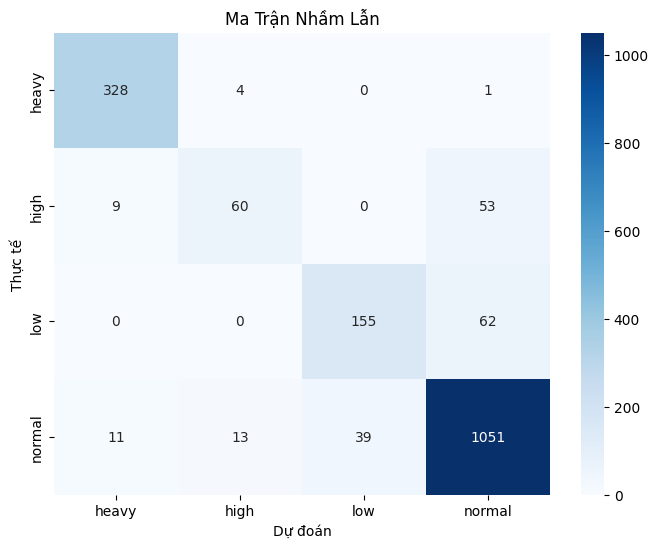

In [6]:
# Báo cáo phân loại
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred))
# Tạo ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)

# Hiển thị ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=logreg_model.classes_, yticklabels=logreg_model.classes_)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma Trận Nhầm Lẫn')
plt.show()

In [7]:
# Dự đoán tình trạng giao thông trên tập kiểm tra
y_pred = logreg_model.predict(X_test_scaled)

# In ra 10 kết quả dự đoán đầu tiên
print("Dự đoán tình trạng giao thông trên tập kiểm tra:")
print(y_pred[:10])

# So sánh với tình trạng giao thông thực tế (nhãn thực tế)
print("So sánh với tình trạng giao thông thực tế:")
print(y_test[:10])  # In ra 10 kết quả nhãn thực tế


Dự đoán tình trạng giao thông trên tập kiểm tra:
['low' 'normal' 'normal' 'normal' 'normal' 'normal' 'heavy' 'normal'
 'normal' 'normal']
So sánh với tình trạng giao thông thực tế:
4039       low
4247    normal
1966    normal
4765      high
1374    normal
5192    normal
1894     heavy
3960       low
4801    normal
2899    normal
Name: Traffic Situation, dtype: object
